In [1]:
!pip install --quiet tables


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from anndata import AnnData
import scanpy as sc
from scipy.sparse import csr_matrix
from muon import atac as ac
import mygene as mg

In [3]:
DATA_DIR = "/lustre/groups/ml01/workspace/dominik.klein/dominik.klein/neurips2022"

In [4]:
FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

In [5]:
df_cell = pd.read_csv(FP_CELL_METADATA)
df_cell

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...,...
281523,96a60b026659,10,31800,hidden,multiome
281524,d493e546991e,10,31800,hidden,multiome
281525,05666c99aa48,10,31800,hidden,multiome
281526,121f946642b5,10,31800,hidden,multiome


In [6]:
df_cell_multi = df_cell[(df_cell.technology=="multiome") & (df_cell.cell_type != "hidden") & (df_cell.donor==31800)]

In [7]:
del df_cell

In [8]:
df_subsampled = df_cell_multi.sample(n=4000, random_state=0)

In [9]:
del df_cell_multi

In [10]:
df_multi_train_x = pd.read_hdf(FP_MULTIOME_TRAIN_INPUTS)

In [11]:
df_1 = df_multi_train_x[df_multi_train_x.index.isin(df_subsampled.cell_id)]

In [12]:
del df_multi_train_x

In [13]:
df_multi_train_y = pd.read_hdf(FP_MULTIOME_TRAIN_TARGETS)

In [14]:
df_2 = df_multi_train_y[df_multi_train_y.index.isin(df_subsampled.cell_id)]

In [15]:
del df_multi_train_y

In [16]:
list(df_1.index) == list(df_2.index)

True

In [17]:
df_2


gene_id,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
4c45fb900fbb,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.812877,...,0.000000,4.812877,4.812877,0.0,0.0,0.000000,0.0,0.000000,0.00000,4.812877
c462df3e03b5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.166480,...,4.166480,0.000000,0.000000,0.0,0.0,4.851843,0.0,4.166480,4.16648,0.000000
27b9aa554758,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,4.805037,0.0,0.000000,0.00000,0.000000
9a0cbad09594,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,4.153503,4.838765,5.241588,0.0,0.0,4.838765,0.0,0.000000,0.00000,4.153503
98b88fc30c58,4.523501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,5.211208,4.523501,5.614853,0.0,0.0,4.523501,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946cf349f84e,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,4.580110,0.0,0.000000,0.00000,0.000000
da6baa1b0624,4.634923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.634923,...,4.634923,0.000000,0.000000,0.0,0.0,5.323205,0.0,0.000000,0.00000,4.634923
ba7d40e15f3d,5.545830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,6.237023,0.0,0.000000,0.00000,0.000000


In [18]:
df_subsampled.set_index("cell_id", inplace=True)

In [19]:
df_subsampled_ordered = df_subsampled.reindex(list(df_1.index))

In [20]:
df_2.columns

Index(['ENSG00000121410', 'ENSG00000268895', 'ENSG00000175899',
       'ENSG00000245105', 'ENSG00000166535', 'ENSG00000256661',
       'ENSG00000184389', 'ENSG00000128274', 'ENSG00000094914',
       'ENSG00000081760',
       ...
       'ENSG00000086827', 'ENSG00000174442', 'ENSG00000122952',
       'ENSG00000198205', 'ENSG00000198455', 'ENSG00000070476',
       'ENSG00000203995', 'ENSG00000162378', 'ENSG00000159840',
       'ENSG00000074755'],
      dtype='object', name='gene_id', length=23418)

In [22]:
mg = mg.MyGeneInfo()

In [23]:
res = mg.getgenes(list(df_2.columns), fields="symbol", as_dataframe=True, species='human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-23418...done.


In [24]:
import numpy as np
(~res["notfound"].isnull()).sum()

98

In [25]:
res_reduced = res[["symbol"]]

In [26]:
res_reduced["symbol"].isnull().sum()

4441

In [27]:
d = res_reduced.to_dict()["symbol"]

In [28]:
d_filled = {key: val if isinstance(val, str) else key for key, val in d.items()} 

In [29]:
df_2_renamed = df_2.rename(columns=d_filled)

In [30]:
adata = AnnData(csr_matrix(df_2), obs=df_subsampled_ordered)

In [31]:
adata.var_names = df_2_renamed.columns

In [32]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [33]:
adata_peaks = AnnData(csr_matrix(df_2), obs=df_subsampled_ordered)

In [34]:
print(adata_peaks.shape)
min_cells = int(adata_peaks.shape[0] * 0.05)
sc.pp.filter_genes(adata_peaks, min_cells=min_cells)
print(adata_peaks.shape)

(4000, 23418)
(4000, 11595)


In [35]:
adata.obsm["peaks_tfidf"] = adata_peaks.X.copy()


In [36]:
ac.tl.lsi(adata_peaks, n_comps=30)

In [37]:
adata_peaks.obsm

AxisArrays with keys: X_lsi

In [38]:
adata_peaks.obsm["X_lsi"].shape

(4000, 30)

In [39]:
adata.obsm["X_lsi"] = adata_peaks.obsm["X_lsi"].copy()

In [40]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat", n_top_genes=2000)

In [41]:
sc.pp.pca(adata, n_comps=30)

In [42]:
sc.pp.neighbors(adata)

In [43]:
sc.tl.umap(adata)

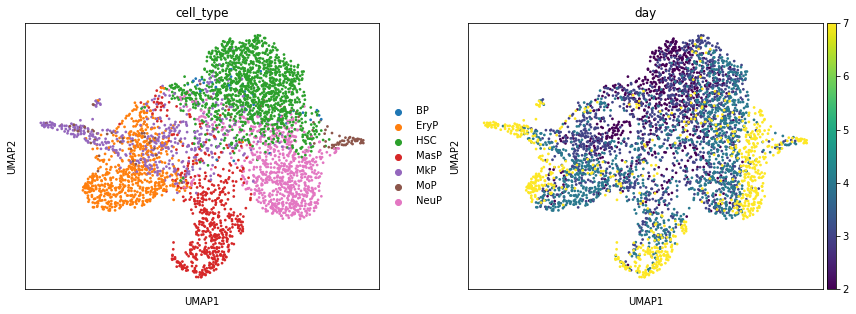

In [44]:
sc.pl.umap(adata, color=['cell_type', 'day'])

In [45]:
adata.obsm["X_umap_GEX"] = adata.obsm["X_umap"].copy()

In [46]:
sc.pp.neighbors(adata, use_rep="X_lsi", key_added="neighbors_atac")

In [47]:
sc.tl.umap(adata, neighbors_key="neighbors_atac")

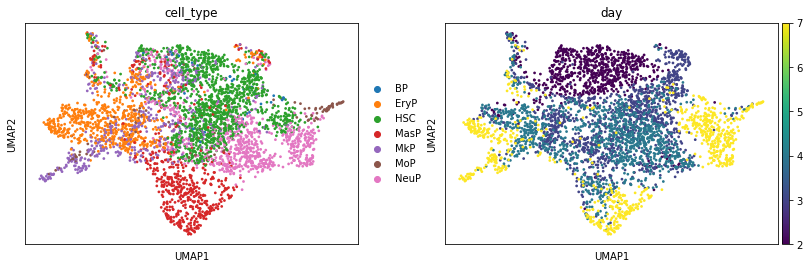

In [48]:
sc.pl.umap(adata, color=['cell_type', 'day'])

In [49]:
adata.obsm["X_umap_ATAC"] = adata.obsm["X_umap"].copy()

In [50]:
del adata.obsm["X_umap"]

In [51]:
adata

AnnData object with n_obs × n_vars = 4000 × 2000
    obs: 'day', 'donor', 'cell_type', 'technology', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'neighbors_atac'
    obsm: 'peaks_tfidf', 'X_lsi', 'X_pca', 'X_umap_GEX', 'X_umap_ATAC'
    varm: 'PCs'
    obsp: 'distances', 'connectivities', 'neighbors_atac_distances', 'neighbors_atac_connectivities'

In [52]:
adata.obsm["X_lsi"].shape, adata.obsm["X_pca"].shape

((4000, 30), (4000, 30))

In [53]:
adata.write("/lustre/groups/ml01/workspace/dominik.klein/dominik.klein/neurips2022/adata_neurips2022.h5ad")